#**Implementation of K-Means Clustering using Marks dataset - Elbow Method**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv("Marks.csv")

In [2]:
# Display the dataset
print("Dataset Overview:")
print(df)

Dataset Overview:
    Roll no.  English  Maths  Science
0          1       99     96       97
1          2       99     96       97
2          3       98     97       97
3          4       95    100       95
4          5       95     96       96
5          6       96     97       98
6          7       75     78       79
7          8       70     72       71
8          9       68     69       70
9         10       71     78       79
10        11       40     32       30
11        12       28     34       32
12        13       78     75       70
13        14       30     32       34
14        15       99     98      100


In [5]:
# Extract relevant features
x = df.iloc[:, 1:4]
print("\nFeature Data:")
print(x.head())


Feature Data:
   English  Maths  Science
0       99     96       97
1       99     96       97
2       98     97       97
3       95    100       95
4       95     96       96


In [6]:
print(x.tail())

    English  Maths  Science
10       40     32       30
11       28     34       32
12       78     75       70
13       30     32       34
14       99     98      100


In [7]:
# Elbow Method to determine the optimal number of clusters
distortion = []
k = range(1, 13)

for i in k:
    kmeans_model = KMeans(n_clusters=i, max_iter=25, random_state=1)
    kmeans_model.fit(x)
    distortion.append(kmeans_model.inertia_)  # Inertia calculates the WSS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

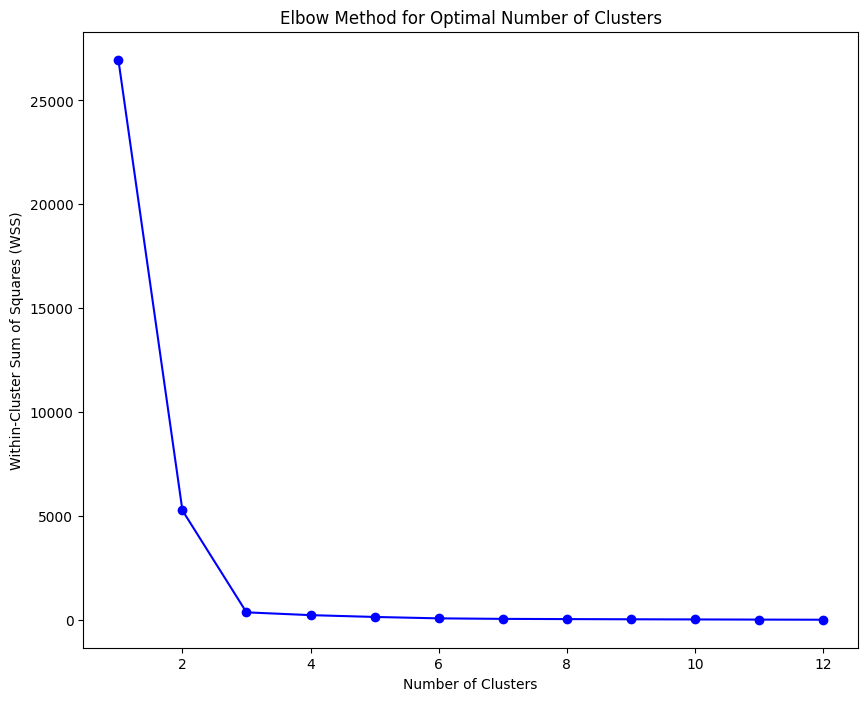

In [9]:
# Plot the Elbow Method graph
plt.figure(figsize=(10, 8))
plt.plot(k, distortion, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WSS)")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

In [10]:
# Final K-Means model with optimal number of clusters
optimal_clusters = 3  # Based on the Elbow plot
kmeans_final = KMeans(n_clusters=optimal_clusters, max_iter=25, random_state=1)
kmeans_final.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=25, n_clusters=3, random_state=1)

In [11]:
# Display cluster centroids and labels
print("\nCluster Centers:")
print(kmeans_final.cluster_centers_)


Cluster Centers:
[[72.4        74.4        73.8       ]
 [32.66666667 32.66666667 32.        ]
 [97.28571429 97.14285714 97.14285714]]


In [12]:
print("\nCluster Labels:")
print(kmeans_final.labels_)


Cluster Labels:
[2 2 2 2 2 2 0 0 0 0 1 1 0 1 2]


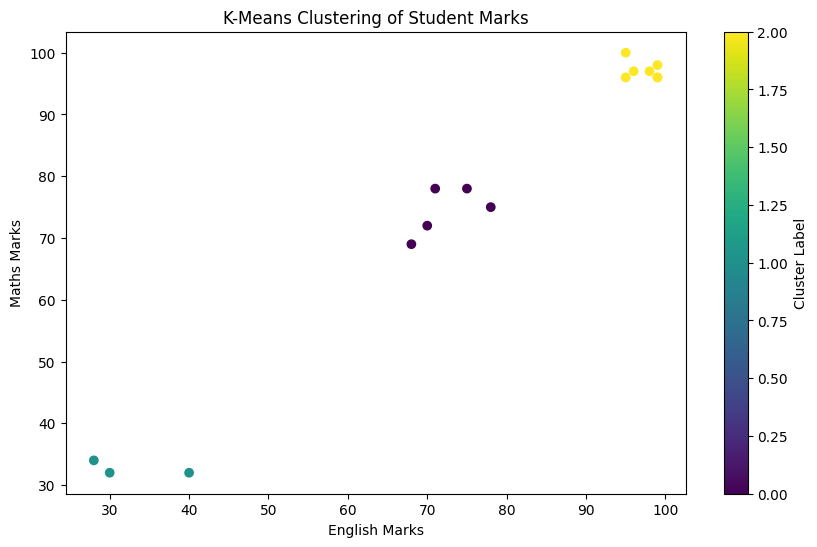

In [13]:
# Scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(x['English'], x['Maths'], c=kmeans_final.labels_, cmap='viridis')
plt.xlabel("English Marks")
plt.ylabel("Maths Marks")
plt.title("K-Means Clustering of Student Marks")
plt.colorbar(label='Cluster Label')
plt.show()

---

## **Conclusion:**


---


In this analysis, we applied K-Means clustering to segment students based on their marks in English and Maths. Using the Elbow Method, we determined that three clusters were optimal for this dataset.

The K-Means algorithm effectively grouped students into three distinct clusters, each representing different levels of academic performance. The clusters are visualized in a scatter plot, where students are color-coded according to their assigned cluster. This segmentation allows for a better understanding of student performance patterns and can assist educators in tailoring their strategies to address the needs of different student groups.

The findings from this clustering analysis can be used to identify students who may need additional support or resources and to recognize high performers. This approach provides valuable insights into the academic landscape and helps in making data-driven decisions to enhance educational outcomes.

---